In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
drop_extreme = True
drf = False

In [3]:
df_train = pd.read_csv('train.csv')
df_train_length = df_train.shape[0]
df_test = pd.read_csv('test.csv')

In [4]:
print "training data shape = ", df_train.shape
print "testing data shape = ", df_test.shape

training data shape =  (1460, 81)
testing data shape =  (1459, 80)


In [5]:
df_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [6]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)

In [7]:
print "Total data shape = ", df.shape

Total data shape =  (2919, 81)


In [8]:
df_train.shape

(1460, 81)

In [9]:
df_test.shape

(1459, 80)

In [10]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
df_train.isnull().sum(axis=0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [13]:
df_train.isnull().sum(axis=1).value_counts()

4     635
5     501
3     132
10     60
6      58
9      32
2      16
11      7
8       5
7       5
15      4
14      3
1       2
dtype: int64

In [14]:
def hist_plot(column_name, kind=1):
    fig, ax1 = plt.subplots(1,2, figsize=(10,5))
    df_train[column_name].hist(ax=ax1[0])
    ax1[0].set_xlabel(column_name, fontsize=14, fontweight='bold')
    if kind == 1:
        df_train[column_name].apply(lambda x: np.log(x)).hist()
    else:
        df_train[column_name].apply(lambda x: np.log1p(x)).hist()
    ax1[1].set_xlabel(column_name, fontsize=14, fontweight='bold')
    ax1[1].set_title('Log', fontsize=16, fontweight='bold')
    

## Saleprice

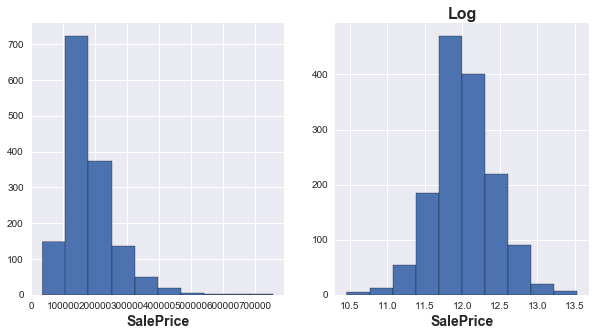

In [15]:
hist_plot('SalePrice')

The sale price has a high variance. We will take a log of the price as the target

In [16]:
df['SalePrice'] = np.log(df['SalePrice'])

In [17]:
mean_saleprice = df[:df_train_length].SalePrice.mean()
max_saleprice = df[:df_train_length].SalePrice.max()
min_saleprice = df[:df_train_length].SalePrice.min()

df['SalePrice'] = (df['SalePrice'] - mean_saleprice)/(max_saleprice - min_saleprice)

## Lot frontage

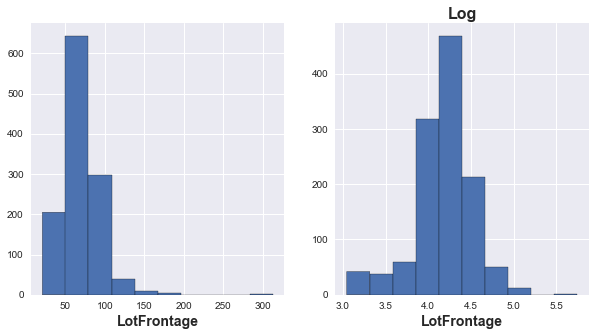

In [18]:
hist_plot('LotFrontage')

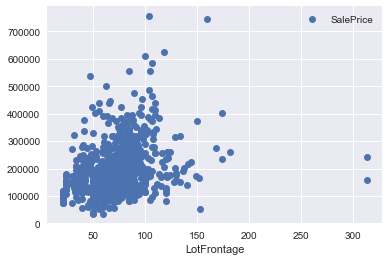

In [19]:
df_train.plot('LotFrontage','SalePrice', style='o')

In [20]:
df['LotFrontage'] = np.log(df['LotFrontage'])

There seems to be a linear patten of LotFrontage with SalePrice.
We can fill the missing values either by -
1. Regressing these features and fill the missing values with prediction
2. Sample from the normal distribution of LotFrontage

We will follow the second one.

In [21]:
LotFrontage_avg = df_train['LotFrontage'].mean()
LotFrontage_std = df_train['LotFrontage'].std()
LotFrontage_null_count = df['LotFrontage'].isnull().sum()
    
age_null_random_list = np.random.normal(loc=LotFrontage_avg, scale=LotFrontage_std, size=LotFrontage_null_count)
df['LotFrontage'][np.isnan(df['LotFrontage'])] = age_null_random_list
#dataset['custAge'] = dataset['custAge'].astype(int)

/Users/pkjain/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
df['LotFrontage'] = (df['LotFrontage'] - df['LotFrontage'].mean())/(df['LotFrontage'].max() - df['LotFrontage'].min())

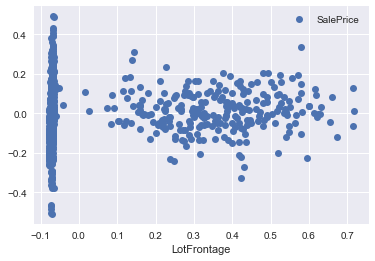

In [23]:
df.plot('LotFrontage','SalePrice', style='o')

## Alley

In [24]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

Alley has most of the data missing. We will ignore Alley

In [25]:
df.drop('Alley', axis=1, inplace=True)

## MasVnrType

In [26]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
df_train.MasVnrType.isnull().sum()

8

There are only 8 missing values and majority of the houses have None. We will replace the null values with None and treat None as a seaparate category.

In [28]:
df.ix[df.MasVnrType.isnull(), 'MasVnrType'] = 'None'

/Users/pkjain/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [29]:
MasVnrType_dummy = pd.get_dummies(df['MasVnrType'], prefix='MasVnrType',drop_first=drf)
df = df.join(MasVnrType_dummy)

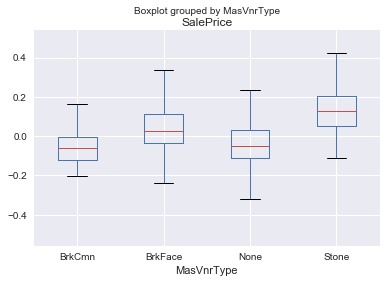

In [30]:
df[:df_train_length].boxplot('SalePrice',by='MasVnrType')

## MasVnrArea

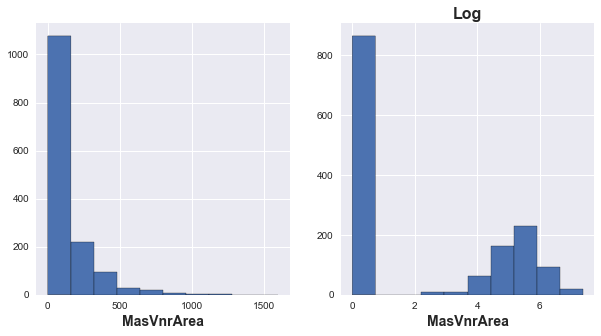

In [31]:
hist_plot('MasVnrArea', kind=2)

The missing are same as MasVnrType. We will replace with the majority ones = 0

In [32]:
df.ix[df.MasVnrArea.isnull(), 'MasVnrArea'] = 0

/Users/pkjain/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [33]:
df['MasVnrArea'] = np.log1p(df.MasVnrArea)

## BsmtQual

In [34]:
df_train.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [35]:
df_train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

From Data description, the categories are ordered.

In [36]:
df.ix[df.BsmtQual.isnull(), 'BsmtQual'] = 'NA'

In [37]:
df['BsmtQual'] = df['BsmtQual'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).astype('int')

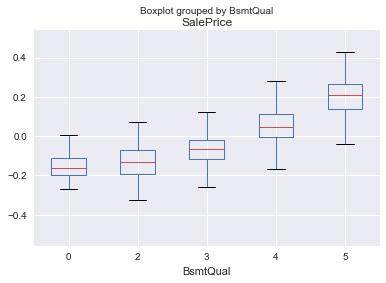

In [38]:
df[:df_train_length].boxplot('SalePrice',by='BsmtQual')

## BsmtCond

In [39]:
df_train.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [40]:
df_train.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

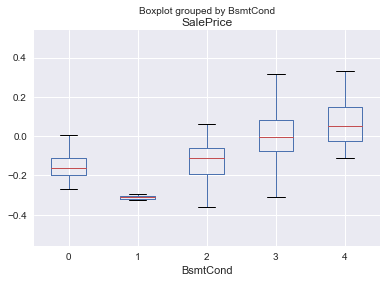

In [41]:
df.ix[df.BsmtCond.isnull(), 'BsmtCond'] = 'NA'
df['BsmtCond'] = df['BsmtCond'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='BsmtCond')

In [42]:
df.ix[df.BsmtCond == 1, 'BsmtCond'] = 2

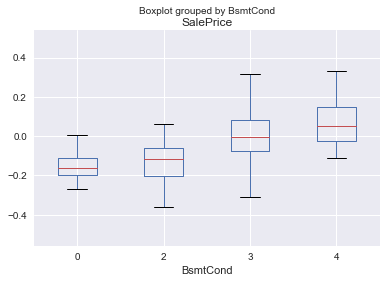

In [43]:
df[:df_train_length].boxplot('SalePrice',by='BsmtCond')

## BsmtExposure

In [44]:
df_train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

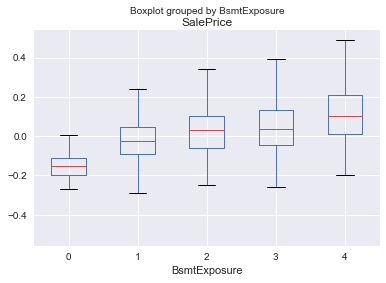

In [45]:
df.ix[df.BsmtExposure.isnull(), 'BsmtExposure'] = 'NA'
df['BsmtExposure'] = df['BsmtExposure'].map({'NA':0,'No':1, 'Mn':2, 'Av':3, 'Gd':4}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='BsmtExposure')

## BsmtFinType1

In [46]:
df[:df_train_length].BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

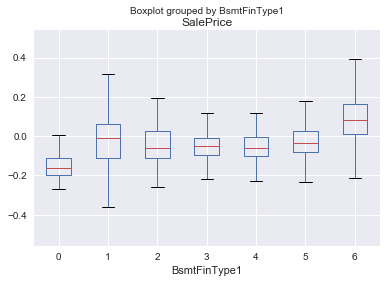

In [47]:
df.ix[df.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NA'
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0,'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='BsmtFinType1')

## BsmtFinSF1

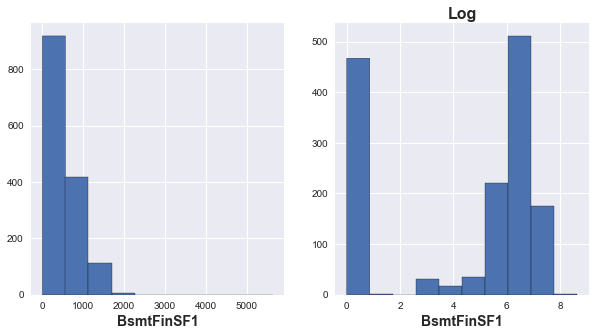

In [48]:
hist_plot('BsmtFinSF1', kind=2)

In [49]:
df['BsmtFinSF1'] = np.log1p(df.BsmtFinSF1)

## BsmtFinType2

In [50]:
df[:df_train_length].BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

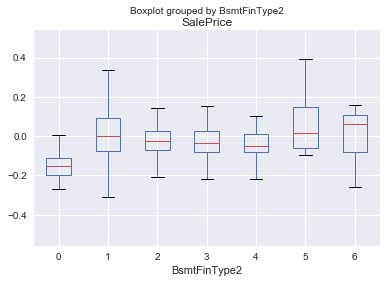

In [51]:
df.ix[df.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NA'
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0,'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='BsmtFinType2')

In [52]:
if drop_extreme:
    df.drop('BsmtFinType2', axis=1, inplace=True)

## BsmtFinSF2

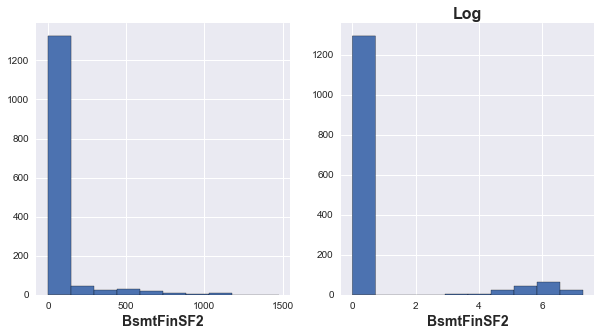

In [53]:
hist_plot('BsmtFinSF2', kind=2)

In [54]:
df['BsmtFinSF2'] = np.log1p(df.BsmtFinSF2)

In [55]:
if drop_extreme:
    df.drop('BsmtFinSF2', axis=1, inplace=True)

## Electrical

In [56]:
df[:df_train_length].Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [57]:
df.ix[df.Electrical.isnull(),'Electrical'] = 'SBrkr'

In [58]:
df.ix[df.Electrical == 'FuseA', 'Electrical'] = 'Fuse'
df.ix[df.Electrical == 'FuseF', 'Electrical'] = 'Fuse'
df.ix[df.Electrical == 'FuseP', 'Electrical'] = 'Fuse'
df.ix[df.Electrical == 'Mix', 'Electrical'] = 'Fuse'

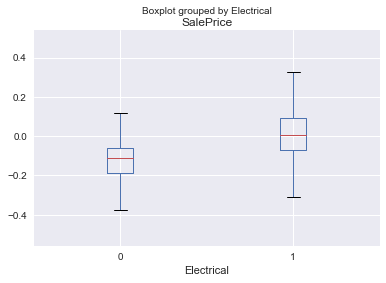

In [59]:
#df['Electrical'] = df['Electrical'].map({'Mix':0,'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4}).astype('int')
df['Electrical'] = df['Electrical'].map({'Fuse':0, 'SBrkr':1}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='Electrical')

## FireplaceQu

In [60]:
df[:df_train_length].FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

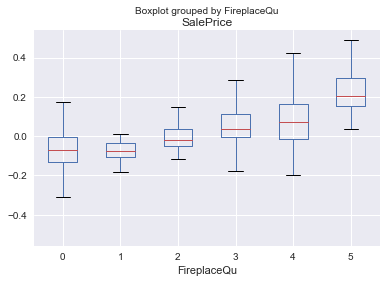

In [61]:
df.ix[df.FireplaceQu.isnull(), 'FireplaceQu'] = 'NA'
df['FireplaceQu'] = df['FireplaceQu'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='FireplaceQu')

## Fireplaces

In [62]:
df[:df_train_length]['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [63]:
df[:df_train_length]['FireplaceQu'].corr(df['Fireplaces'])

0.86324123588845303

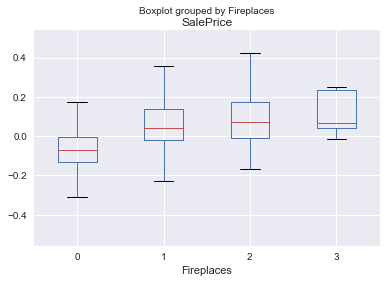

In [64]:
#df.ix[df.FireplaceQu.isnull(), 'FireplaceQu'] = 'NA'
#df['FireplaceQu'] = df['FireplaceQu'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='Fireplaces')

In [65]:
df.ix[df.Fireplaces > 2, 'Fireplaces'] = 2 

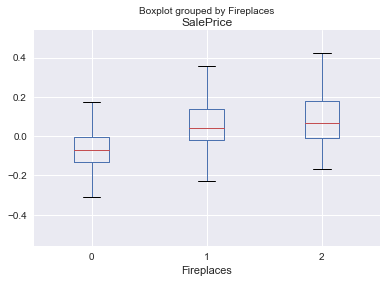

In [66]:
df[:df_train_length].boxplot('SalePrice',by='Fireplaces')

## GarageType

In [67]:
df[:df_train_length].GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

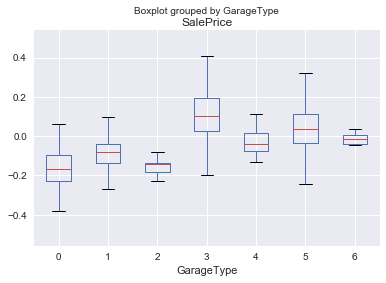

In [68]:
df.ix[df.GarageType.isnull(), 'GarageType'] = 'NA'
df['GarageType'] = df['GarageType'].map({'NA':0,'Detchd':1, 'CarPort':2, 'BuiltIn':3, 'Basment':4, 'Attchd':5, '2Types':6}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='GarageType')

## GarageYrBlt

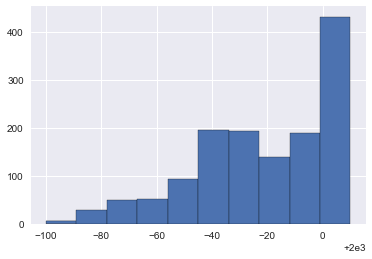

In [69]:
df[:df_train_length].GarageYrBlt.hist()

In [72]:
df[:df_train_length].GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [73]:
_,gbins = pd.qcut(df[:df_train_length].GarageYrBlt,5,retbins=True)

In [75]:
if 1:
    df.ix[df.GarageYrBlt <= 1957,'GarageYrBlt'] = 1
    df.ix[(df.GarageYrBlt > 1957) & (df.GarageYrBlt <=1973),'GarageYrBlt'] = 2
    df.ix[(df.GarageYrBlt > 1973) & (df.GarageYrBlt <=1993),'GarageYrBlt'] = 3
    df.ix[(df.GarageYrBlt > 1993) & (df.GarageYrBlt <=2004),'GarageYrBlt'] = 4
    df.ix[(df.GarageYrBlt > 2004) & (df.GarageYrBlt <=2010),'GarageYrBlt'] = 5
    df.ix[(df.GarageYrBlt > 2010),'GarageYrBlt'] = 6
    df.ix[df.GarageYrBlt.isnull(),'GarageYrBlt'] = 0
    
    df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

## GarageFinish

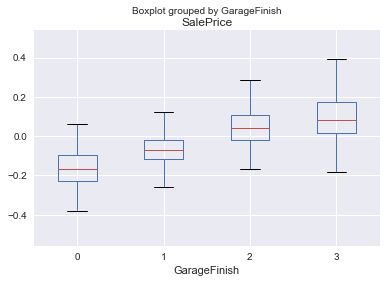

In [77]:
df.ix[df.GarageFinish.isnull(), 'GarageFinish'] = 'NA'
df['GarageFinish'] = df['GarageFinish'].map({'NA':0,'Unf':1, 'RFn':2, 'Fin':3}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='GarageFinish')

## GarageArea

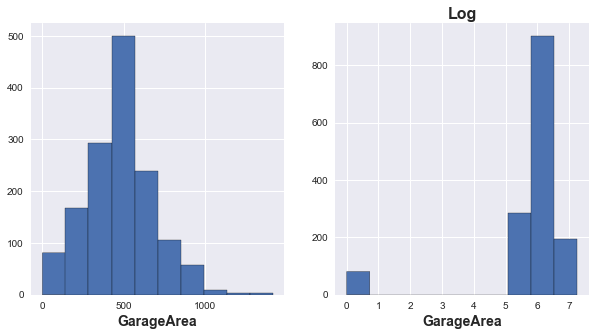

In [78]:
hist_plot('GarageArea', kind=2)

In [79]:
df['GarageArea'] = np.log1p(df.GarageArea)

## GarageCars

In [80]:
df[:df_train_length].GarageCars.value_counts()

2.0    824
1.0    369
3.0    181
0.0     81
4.0      5
Name: GarageCars, dtype: int64

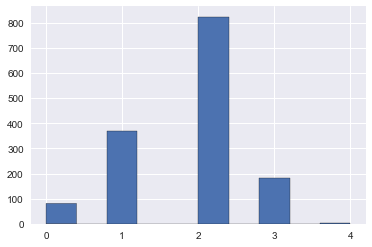

In [81]:
df[:df_train_length].GarageCars.hist()

In [82]:
df.ix[df.GarageCars>3, 'GarageCars'] = 3

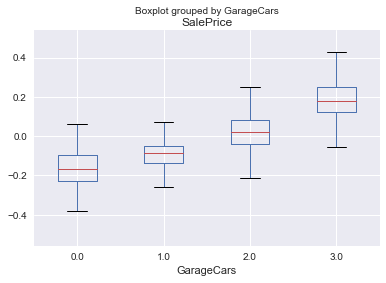

In [83]:
df[:df_train_length].boxplot('SalePrice',by='GarageCars')

## GarageQual

In [84]:
df[:df_train_length].GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

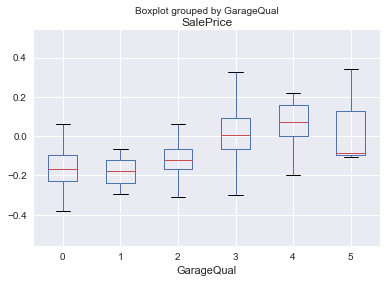

In [85]:
df.ix[df.GarageQual.isnull(), 'GarageQual'] = 'NA'
df['GarageQual'] = df['GarageQual'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='GarageQual')

In [86]:
df.ix[df.GarageQual == 5, 'GarageQual'] = 4
df.ix[df.GarageQual == 1, 'GarageQual'] = 2

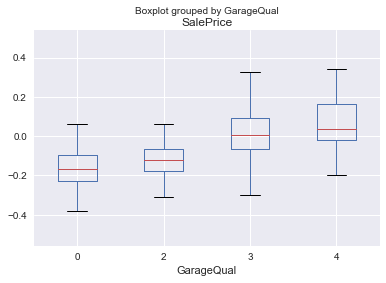

In [87]:
df[:df_train_length].boxplot('SalePrice',by='GarageQual')

## GarageCond

In [88]:
df[:df_train_length].GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

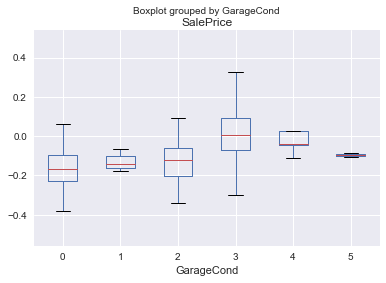

In [89]:
df.ix[df.GarageCond.isnull(), 'GarageCond'] = 'NA'
df['GarageCond'] = df['GarageCond'].map({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='GarageCond')

In [90]:
df.ix[df.GarageCond > 3, 'GarageCond'] = 3
df.ix[df.GarageCond == 1, 'GarageCond'] = 2

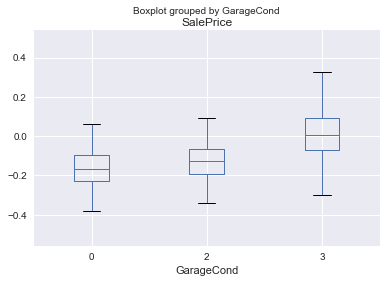

In [91]:
df[:df_train_length].boxplot('SalePrice',by='GarageCond')

## PoolQC and PoolArea

Most of the entries do not have pools. We will ignore these two variables

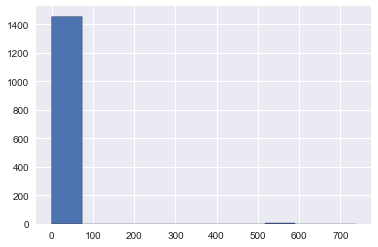

In [92]:
df[:df_train_length].PoolArea.hist()

In [93]:
df.drop(['PoolQC','PoolArea'], axis=1, inplace=True)

## Fence

In [94]:
df[:df_train_length].Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

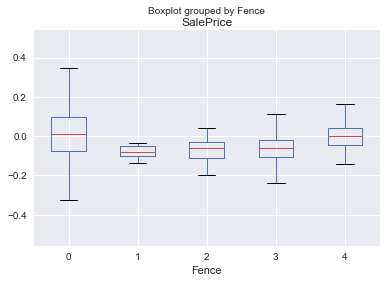

In [95]:
df.ix[df.Fence.isnull(),'Fence']='NA'
df['Fence'] = df['Fence'].map({'NA':0,'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}).astype('int')
df[:df_train_length].boxplot('SalePrice',by='Fence')

In [96]:
if drop_extreme:
    df.drop('Fence', axis=1, inplace=True)

## MiscFeature

In [97]:
df[:df_train_length].MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

This feature can be ignored

In [98]:
df.drop('MiscFeature',axis=1,inplace=True)

## MSZoning

In [99]:
df[:df_train_length].MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

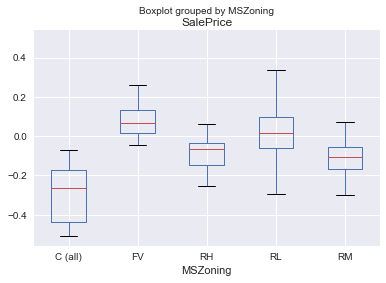

In [100]:
df[:df_train_length].boxplot('SalePrice',by='MSZoning')

The test data has 4 missing values. We will replace them by *RL*

In [101]:
df.ix[df.MSZoning.isnull(),'MSZoning'] = 'RL'

In [102]:
if drop_extreme:
    df.drop('MSZoning', axis=1, inplace=True)
else:
    MSZoning_dummy = pd.get_dummies(df['MSZoning'], prefix='MSZoning',drop_first=drf)
    df = df.join(MSZoning_dummy)

## Street

In [103]:
df[:df_train_length].Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

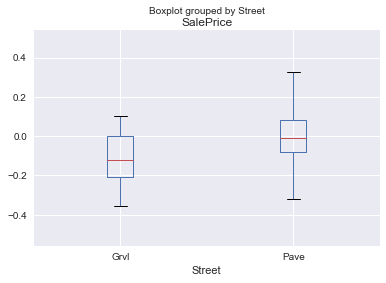

In [104]:
df[:df_train_length].boxplot('SalePrice',by='Street')

In [105]:
df['Street'] = df['Street'].map({'Pave':0,'Grvl':1}).astype('int')

## LotShape

In [106]:
df[:df_train_length].LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [107]:
df['LotShape'] = df['LotShape'].map({'IR3':0,'IR2':1,'IR1':2, 'Reg':3}).astype('int')

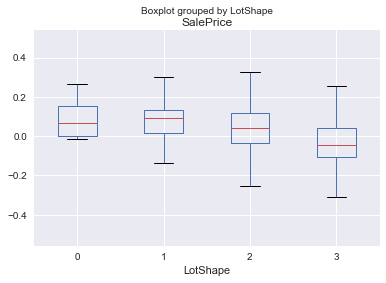

In [108]:
df[:df_train_length].boxplot('SalePrice',by='LotShape')

## LandContour

In [109]:
df[:df_train_length].LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [110]:
df['LandContour'] = df['LandContour'].map({'Low':0,'HLS':1,'Bnk':2, 'Lvl':3}).astype('int')

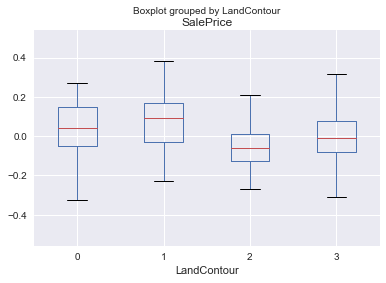

In [111]:
df[:df_train_length].boxplot('SalePrice',by='LandContour')

In [112]:
if drop_extreme:
    df.drop('LandContour', axis=1, inplace=True)

## Utilities

In [113]:
df[:df_train_length].Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

We will ignore this column.

In [114]:
df.drop('Utilities', axis=1, inplace=True)

## LotConfig

In [115]:
df[:df_train_length].LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

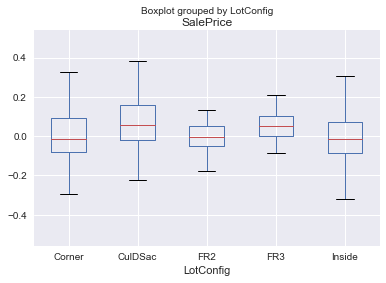

In [116]:
df[:df_train_length].boxplot('SalePrice',by='LotConfig')

LotConfig does not look important

In [117]:
df.drop('LotConfig', axis=1, inplace=True)

## LandSlope

In [118]:
df[:df_train_length].LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [119]:
df['LandSlope'] = df['LandSlope'].map({'Sev':0,'Mod':1,'Gtl':2}).astype('int')

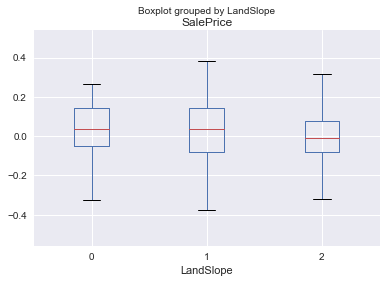

In [120]:
df[:df_train_length].boxplot('SalePrice',by='LandSlope')

## Neighborhood

In [121]:
df[:df_train_length].Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

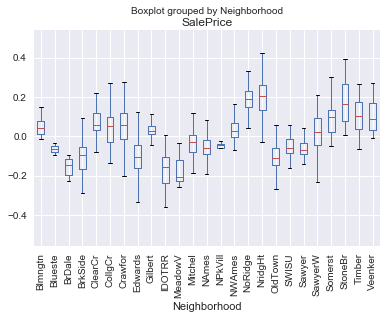

In [122]:
df[:df_train_length].boxplot('SalePrice',by='Neighborhood', rot=90)

In [123]:
df["Neighborhood"] = df.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

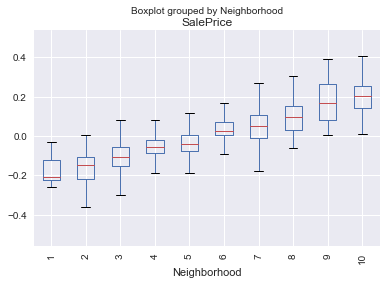

In [124]:
df[:df_train_length].boxplot('SalePrice',by='Neighborhood', rot=90)

In [125]:
if 0:
    Neighborhood_dummy = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood',drop_first=drf)
    df = df.join(Neighborhood_dummy)

## Condition1

In [126]:
df[:df_train_length].Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

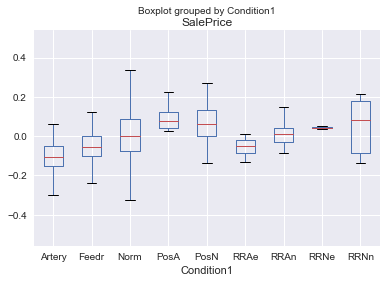

In [127]:
df[:df_train_length].boxplot('SalePrice',by='Condition1')

In [128]:
if 0:
    df.ix[df.Condition1=='PosA','Condition1'] = 'Pos'
    df.ix[df.Condition1=='PosN','Condition1'] = 'Pos'
    df.ix[df.Condition1=='RRAn','Condition1'] = 'RR'
    df.ix[df.Condition1=='RRNn','Condition1'] = 'RR'
    df.ix[df.Condition1=='RRNe','Condition1'] = 'RR'
    df.ix[df.Condition1=='RRAe','Condition1'] = 'RR'
    
    Condition1_dummy = pd.get_dummies(df['Condition1'], prefix='Condition1',drop_first=drf)
    df = df.join(Condition1_dummy)
else:
    df["Condition1"] = df.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})

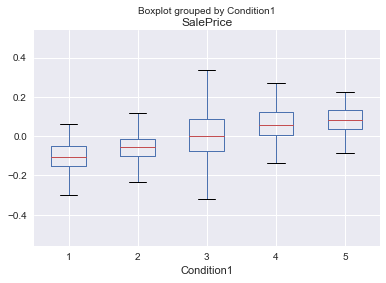

In [129]:
df[:df_train_length].boxplot('SalePrice',by='Condition1')

## Condition2

In [130]:
df[:df_train_length].Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

We will ignore Condition2

In [131]:
df.drop('Condition2',axis=1, inplace=True)

## BldgType

In [132]:
df[:df_train_length].BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

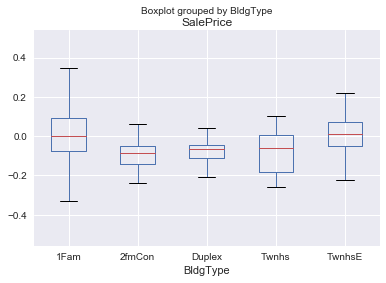

In [133]:
df[:df_train_length].boxplot('SalePrice',by='BldgType')

In [134]:
if drop_extreme:
    df.drop('BldgType', axis=1, inplace=True)
else:
    BldgType_dummy = pd.get_dummies(df['BldgType'], prefix='BldgType',drop_first=drf)
    df = df.join(BldgType_dummy)

## HouseStyle

In [135]:
df[:df_train_length].HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

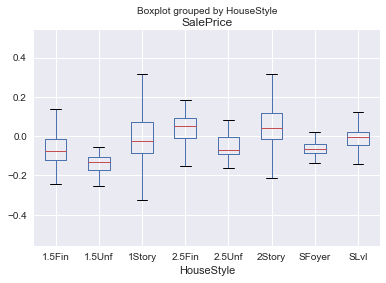

In [136]:
df[:df_train_length].boxplot('SalePrice',by='HouseStyle')

In [137]:
HouseStyle_dummy = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle',drop_first=drf)
df = df.join(HouseStyle_dummy)

## RoofStyle

In [138]:
df[:df_train_length].RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

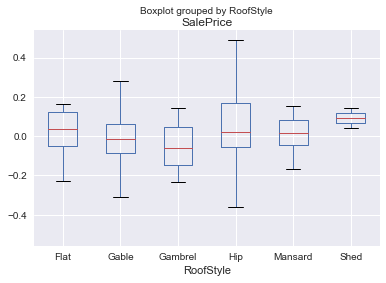

In [139]:
df[:df_train_length].boxplot('SalePrice',by='RoofStyle')

In [140]:
if drop_extreme:
    df.drop('RoofStyle', axis=1, inplace=True)
else:
    RoofStyle_dummy = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle',drop_first=drf)
    df = df.join(RoofStyle_dummy)

## RoofMat1

In [141]:
df[:df_train_length].RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

We can ignore this column

In [142]:
df.drop('RoofMatl', axis=1, inplace=True)

## Exterior1st

In [143]:
df[:df_train_length].Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

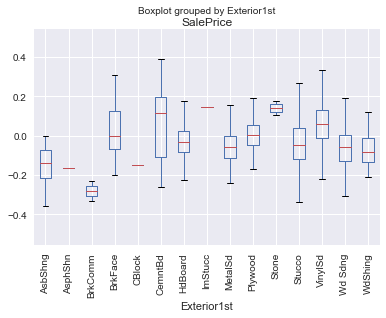

In [144]:
df[:df_train_length].boxplot('SalePrice',by='Exterior1st', rot=90)

In [145]:
if 0:
    df.ix[df.Exterior1st == 'Stone','Exterior1st'] = 'Other'
    df.ix[df.Exterior1st == 'BrkComm','Exterior1st'] = 'Other'
    df.ix[df.Exterior1st == 'AsphShn','Exterior1st'] = 'Other'
    df.ix[df.Exterior1st == 'ImStucc','Exterior1st'] = 'Other'
    df.ix[df.Exterior1st == 'CBlock','Exterior1st'] = 'Other'

    Exterior1st_dummy = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st',drop_first=drf)
    df = df.join(Exterior1st_dummy)
else:
    df["Exterior1st"] = df.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})

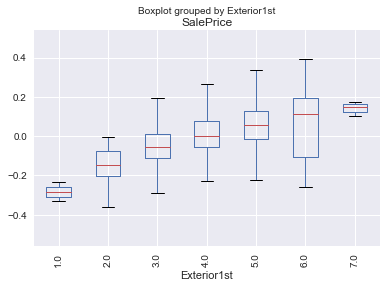

In [146]:
df[:df_train_length].boxplot('SalePrice',by='Exterior1st', rot=90)

## Exterior2nd

In [147]:
df[:df_train_length].Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

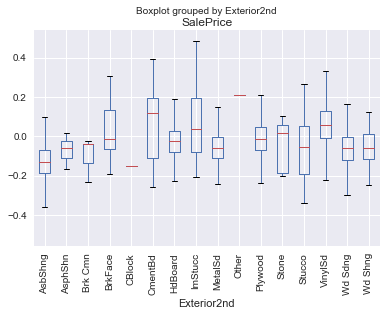

In [148]:
df[:df_train_length].boxplot('SalePrice',by='Exterior2nd', rot=90)

In [149]:
if 0:
    df.ix[df.Exterior2nd == 'Stone','Exterior2nd'] = 'Other'
    df.ix[df.Exterior2nd == 'Brk Cmn','Exterior2nd'] = 'Other'
    df.ix[df.Exterior2nd == 'AsphShn','Exterior2nd'] = 'Other'
    df.ix[df.Exterior2nd == 'ImStucc','Exterior2nd'] = 'Other'
    df.ix[df.Exterior2nd == 'CBlock','Exterior2nd'] = 'Other'

    Exterior2nd_dummy = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd',drop_first=drf)
    df = df.join(Exterior2nd_dummy)
else:
    df["Exterior2nd"] = df.Exterior2nd.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    

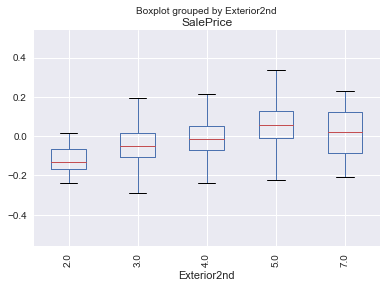

In [150]:
df[:df_train_length].boxplot('SalePrice',by='Exterior2nd', rot=90)

## ExterQual

In [151]:
df[:df_train_length].ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [152]:
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2, 'Gd':3, 'Ex':4}).astype('int')

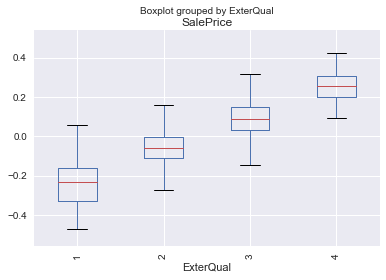

In [153]:
df[:df_train_length].boxplot('SalePrice',by='ExterQual', rot=90)

## ExterCond

In [154]:
df[:df_train_length].ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [155]:
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2, 'Gd':3, 'Ex':4}).astype('int')

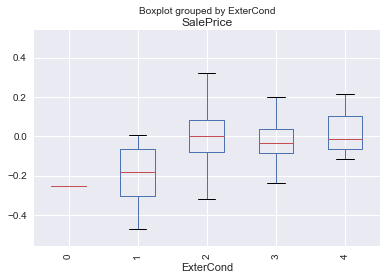

In [156]:
df[:df_train_length].boxplot('SalePrice',by='ExterCond', rot=90)

/Users/pkjain/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


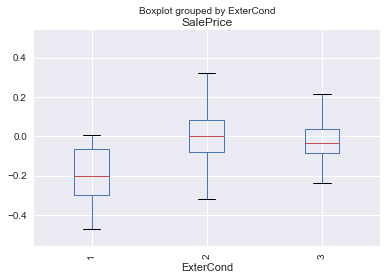

In [157]:
df.ix[df.ExterCond > 3, 'ExterCond'] = 3
df.ix[df.ExterCond < 1, 'ExterCond'] = 1
df[:df_train_length].boxplot('SalePrice',by='ExterCond', rot=90)

## Foundation

In [158]:
df[:df_train_length].Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

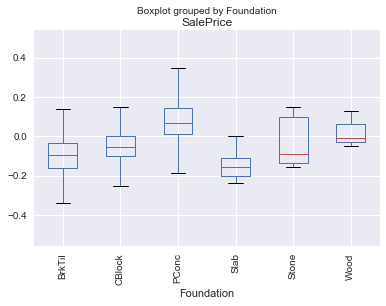

In [159]:
df[:df_train_length].boxplot('SalePrice',by='Foundation', rot=90)

In [160]:
Foundation_dummy = pd.get_dummies(df['Foundation'], prefix='Foundation',drop_first=drf)
df = df.join(Foundation_dummy)

## Heating

In [161]:
df[:df_train_length].Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

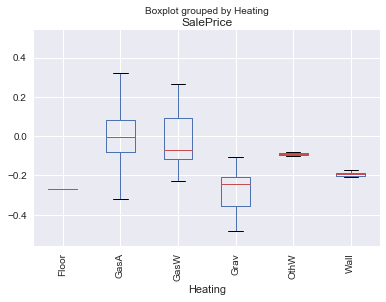

In [162]:
df[:df_train_length].boxplot('SalePrice',by='Heating', rot=90)

In [163]:
if drop_extreme:
    df.drop('Heating',axis=1, inplace=True)
else:
    Heating_dummy = pd.get_dummies(df['Heating'], prefix='Heating',drop_first=drf)
    df = df.join(Heating_dummy)

## HeatingQC

In [164]:
df[:df_train_length].HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [165]:
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2, 'Gd':3, 'Ex':4}).astype('int')

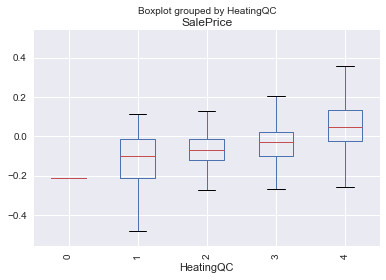

In [166]:
df[:df_train_length].boxplot('SalePrice',by='HeatingQC', rot=90)

In [167]:
df.ix[df.HeatingQC < 1,'HeatingQC'] = 1

/Users/pkjain/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


## CentralAir

In [168]:
df[:df_train_length].CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

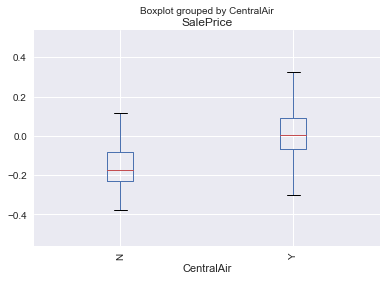

In [169]:
df[:df_train_length].boxplot('SalePrice',by='CentralAir', rot=90)

In [170]:
df['CentralAir'] = df['CentralAir'].map({'N':0,'Y':1}).astype('int')

## KitchenQual

In [171]:
df[:df_train_length].KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [172]:
df.ix[df.KitchenQual.isnull(),'KitchenQual'] = 'Ex'

In [173]:
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2, 'Gd':3, 'Ex':4}).astype('int')

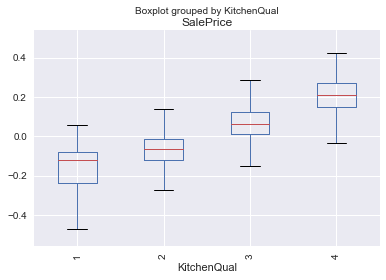

In [174]:
df[:df_train_length].boxplot('SalePrice',by='KitchenQual', rot=90)

## Functional

In [175]:
df[:df_train_length].Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [176]:
df.ix[df.Functional.isnull(),'Functional'] = 'Typ'

In [177]:
df['Functional'] = df['Functional'].map({'Sev':0,'Maj2':1,'Maj1':2, 'Mod':3, 'Min1':4,'Min2':5,'Typ':6}).astype('int')

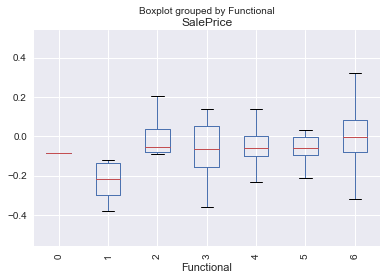

In [178]:
df[:df_train_length].boxplot('SalePrice',by='Functional', rot=90)

In [179]:
if drop_extreme:
    df.drop('Functional', axis=1, inplace=True)

## PavedDrive

In [180]:
df[:df_train_length].PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [181]:
df['PavedDrive'] = df['PavedDrive'].map({'N':0,'P':1,'Y':2}).astype('int')

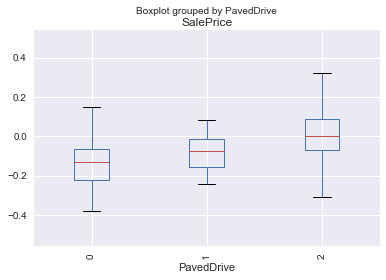

In [182]:
df[:df_train_length].boxplot('SalePrice',by='PavedDrive', rot=90)

## SaleType

In [183]:
df[:df_train_length].SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

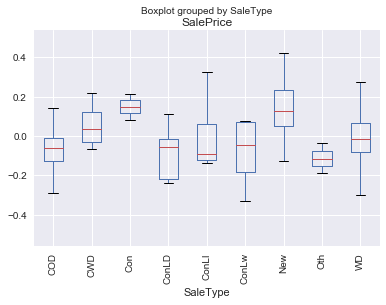

In [184]:
df[:df_train_length].boxplot('SalePrice',by='SaleType', rot=90)

In [185]:
df.ix[df.SaleType == 'COD', 'SaleType'] = 'Other'
df.ix[df.SaleType == 'ConLD', 'SaleType'] = 'Other'
df.ix[df.SaleType == 'ConLw', 'SaleType'] = 'Other'
df.ix[df.SaleType == 'ConLI', 'SaleType'] = 'Other'
df.ix[df.SaleType == 'CWD', 'SaleType'] = 'Other'
df.ix[df.SaleType == 'Oth', 'SaleType'] = 'Other'
df.ix[df.SaleType == 'Con', 'SaleType'] = 'Other'


In [186]:
SaleType_dummy = pd.get_dummies(df['SaleType'], prefix='SaleType',drop_first=drf)
df = df.join(SaleType_dummy)

## SaleCondition

In [187]:
df[:df_train_length].SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

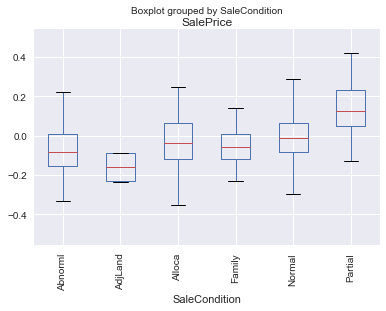

In [188]:
df[:df_train_length].boxplot('SalePrice',by='SaleCondition', rot=90)

In [189]:
SaleCondition_dummy = pd.get_dummies(df['SaleCondition'], prefix='SaleCondition',drop_first=drf)
df = df.join(SaleCondition_dummy)

In [190]:
df[['GarageType', 'GarageCars','GarageArea','GarageQual', 'GarageCond']].corr()

,GarageType,GarageCars,GarageArea,GarageQual,GarageCond
GarageType,1.000000,0.451086,0.486544,0.476019,0.474156
GarageCars,0.451086,1.000000,0.727164,0.578467,0.572927
GarageArea,0.486544,0.727164,1.000000,0.933235,0.946195
GarageQual,0.476019,0.578467,0.933235,1.000000,0.951666
GarageCond,0.474156,0.572927,0.946195,0.951666,1.000000


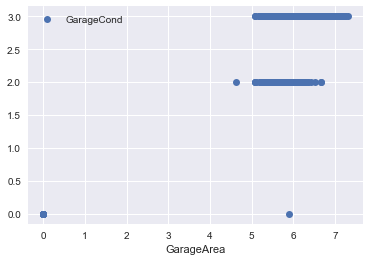

In [191]:
df.plot('GarageArea','GarageCond', style='o')

Garage condition, quality are highly correlated. We can drop quality column

In [192]:
df.drop('GarageQual', axis=1, inplace=True)
if drop_extreme:
    df.drop('GarageArea', axis=1, inplace=True)

## LotArea

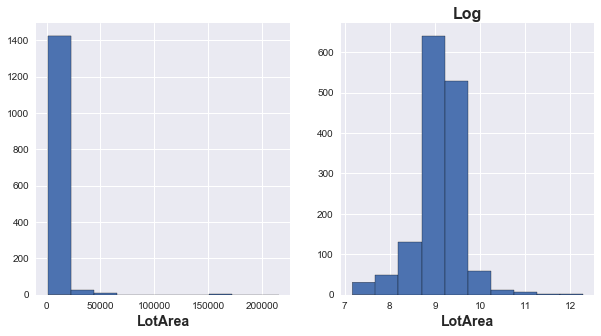

In [193]:
hist_plot('LotArea')

In [194]:
df['LotArea'] = np.log(df['LotArea'])

In [195]:
mean_LotArea = df[:df_train_length].LotArea.mean()
max_LotArea = df[:df_train_length].LotArea.max()
min_LotArea = df[:df_train_length].LotArea.min()

df['LotArea'] = (df['LotArea'] - mean_LotArea)/(max_LotArea - min_LotArea)

## TotalBsmtSF

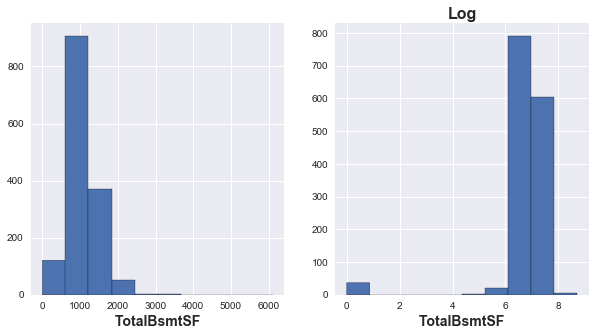

In [196]:
hist_plot('TotalBsmtSF', kind=2)

In [197]:
df['TotalBsmtSF']=np.log1p(df['TotalBsmtSF'])

## 1stFlrSF

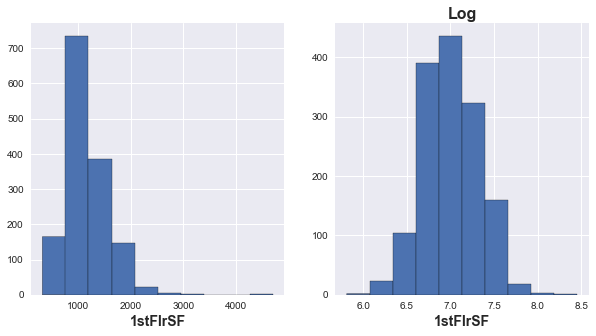

In [198]:
hist_plot('1stFlrSF')

In [199]:
df['1stFlrSF']=np.log(df['1stFlrSF'])

In [200]:
mean_1stFlrSF = df[:df_train_length]['1stFlrSF'].mean()
max_1stFlrSF = df[:df_train_length]['1stFlrSF'].max()
min_1stFlrSF = df[:df_train_length]['1stFlrSF'].min()

df['1stFlrSF'] = (df['1stFlrSF'] - mean_1stFlrSF)/(max_1stFlrSF - min_1stFlrSF)

## 2ndFlrSF

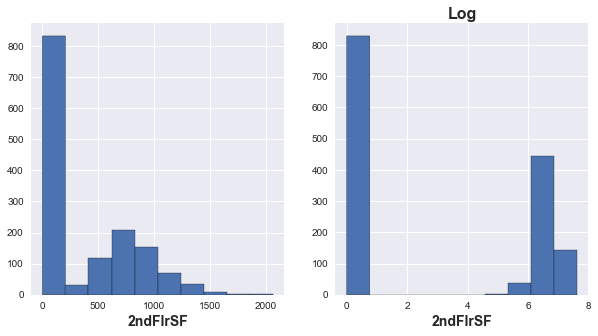

In [201]:
hist_plot('2ndFlrSF', kind=2)

In [202]:
df['2ndFlrSF']=np.log1p(df['2ndFlrSF'])

## LowQualFinSF

In [203]:
df[:df_train_length].LowQualFinSF.value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

Most of the data has 0. We will drop this column

In [204]:
df.drop('LowQualFinSF', axis=1, inplace=True)

## GrLivArea

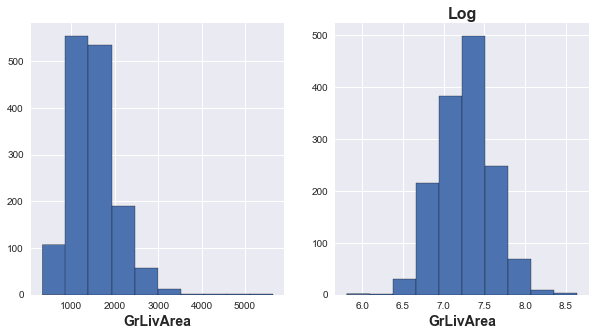

In [205]:
hist_plot('GrLivArea')

In [206]:
df['GrLivArea']=np.log(df['GrLivArea'])

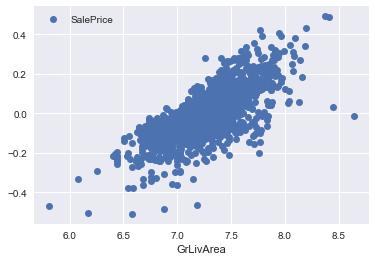

In [207]:
df.plot('GrLivArea','SalePrice', style='o')

In [208]:
df['GrLivArea'] = (df['GrLivArea'] - df['GrLivArea'].mean())/(df['GrLivArea'].max() - df['GrLivArea'].min())

## WoodDeckSF

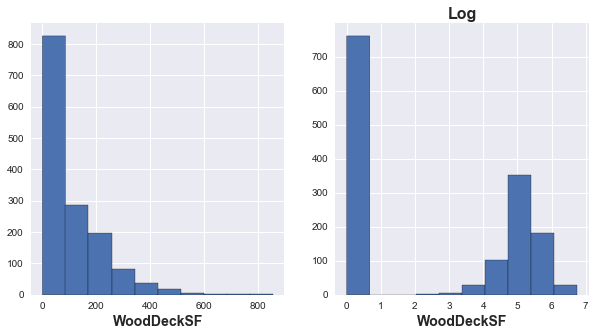

In [209]:
hist_plot('WoodDeckSF', kind=2)

In [210]:
df['WoodDeckSF'] = np.log1p(df['WoodDeckSF'])

## OpenPorchSF

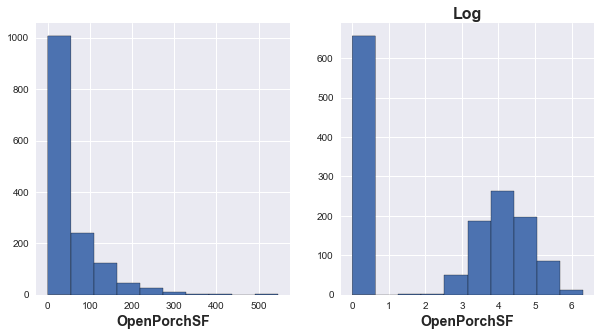

In [211]:
hist_plot('OpenPorchSF', kind=2)

In [212]:
df['OpenPorchSF'] = np.log1p(df['OpenPorchSF'])

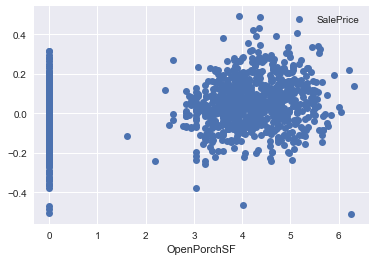

In [213]:
df[:df_train_length].plot('OpenPorchSF','SalePrice',style='o')

## EnclosedPorch

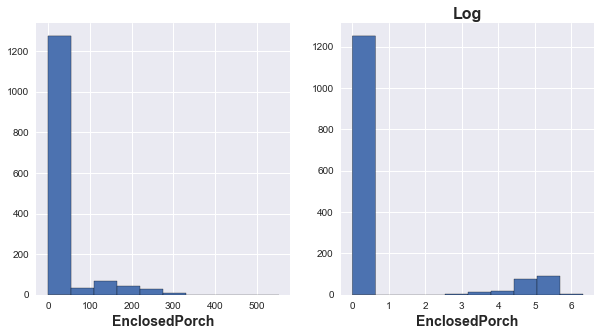

In [214]:
hist_plot('EnclosedPorch', kind=2)

In [215]:
df['EnclosedPorch'] = np.log1p(df['EnclosedPorch'])

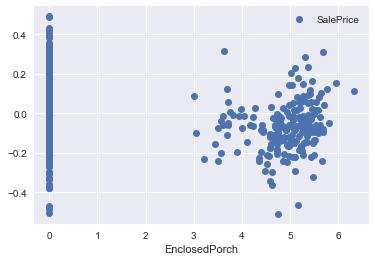

In [216]:
df[:df_train_length].plot('EnclosedPorch','SalePrice',style='o')

In [217]:
if drop_extreme:
    df.drop('EnclosedPorch', axis=1, inplace=True)

## 3SsnPorch

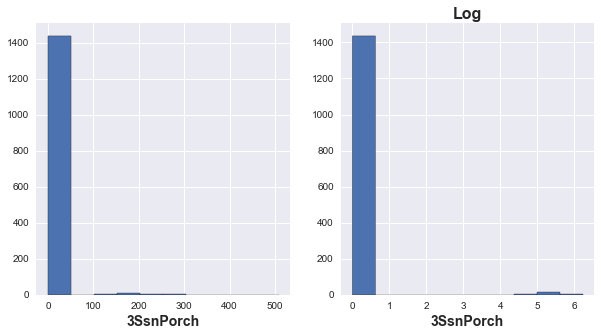

In [218]:
hist_plot('3SsnPorch',kind=2)

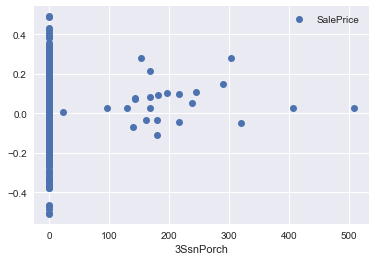

In [219]:
df[:df_train_length].plot('3SsnPorch','SalePrice',style='o')

In [220]:
df['3SsnPorch'] = np.log1p(df['3SsnPorch'])

In [221]:
if drop_extreme:
    df.drop('3SsnPorch', axis=1, inplace=True)

## ScreenPorch

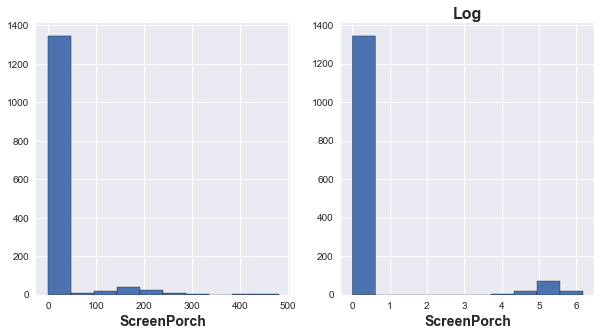

In [222]:
hist_plot('ScreenPorch',kind=2)

In [223]:
df['ScreenPorch'] = np.log1p(df['ScreenPorch'])

In [224]:
if drop_extreme:
    df.drop('ScreenPorch', axis=1, inplace=True)

## MiscVal

In [225]:
df[:df_train_length].MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [226]:
df['MiscVal'] = np.log1p(df['MiscVal'])

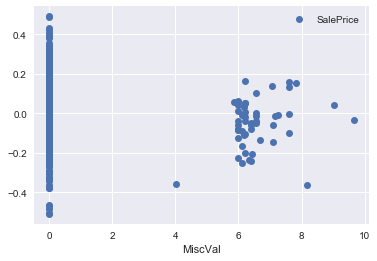

In [227]:
df[:df_train_length].plot('MiscVal','SalePrice',style='o')

In [228]:
df.drop('MiscVal', axis=1, inplace=True)

## MoSold

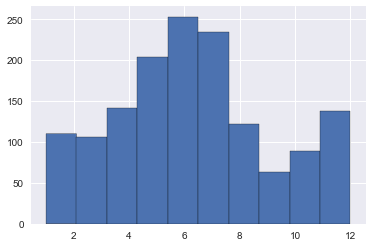

In [229]:
df[:df_train_length].MoSold.hist()

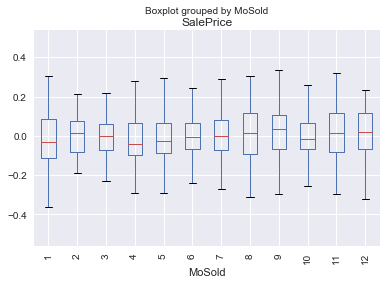

In [230]:
df[:df_train_length].boxplot('SalePrice',by='MoSold', rot=90)

In [231]:
if drop_extreme:
    df.drop('MoSold', axis=1, inplace=True)

## YrSold

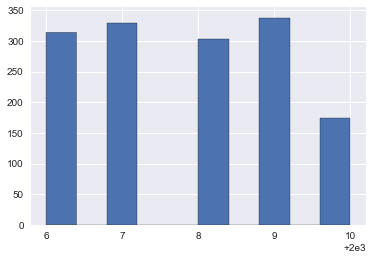

In [232]:
df[:df_train_length].YrSold.hist()

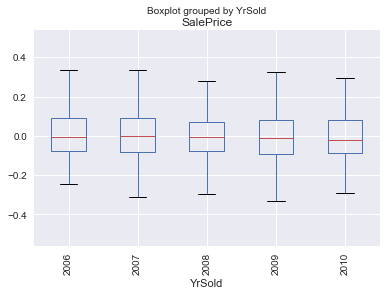

In [233]:
df[:df_train_length].boxplot('SalePrice',by='YrSold', rot=90)

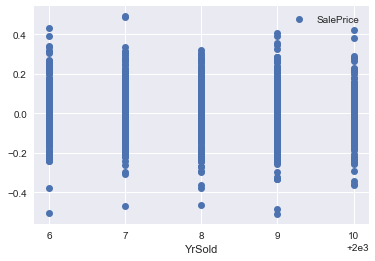

In [234]:
df.plot('YrSold', 'SalePrice', style='o')

In [235]:
df['YrSold'] = df['YrSold'] - 2010

In [236]:
if drop_extreme:
    df.drop('YrSold', axis=1, inplace=True)

## KitchenAbvGr

In [237]:
df[:df_train_length].KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

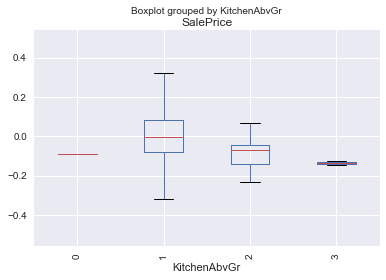

In [238]:
df[:df_train_length].boxplot('SalePrice',by='KitchenAbvGr', rot=90)

In [239]:
if drop_extreme:
    df.drop('KitchenAbvGr', axis=1, inplace=True)

## Bedroom

In [240]:
df[:df_train_length].BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

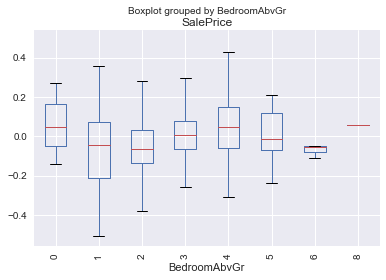

In [241]:
df[:df_train_length].boxplot('SalePrice',by='BedroomAbvGr', rot=90)

In [242]:
df.ix[df.BedroomAbvGr > 4, 'BedroomAbvGr'] = 4
df.ix[df.BedroomAbvGr < 1, 'BedroomAbvGr'] = 1

/Users/pkjain/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


## MSubclass

In [243]:
df.MSSubClass.value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [244]:
df.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                mean    median count
MSSubClass                          
20          0.009348 -0.014905   536
30         -0.191997 -0.166587    69
40         -0.049973 -0.051779     4
45         -0.144757 -0.142793    12
50         -0.068152 -0.075954   144
60          0.102765  0.083036   299
70         -0.019519 -0.021618    60
75          0.013249 -0.006339    16
80         -0.000724 -0.000429    58
85         -0.041696 -0.055161    20
90         -0.079087 -0.066289    52
120         0.047981  0.045930    87
150              NaN       NaN     0
160        -0.070541 -0.043162    63
180        -0.169897 -0.206130    10
190        -0.094072 -0.085332    30

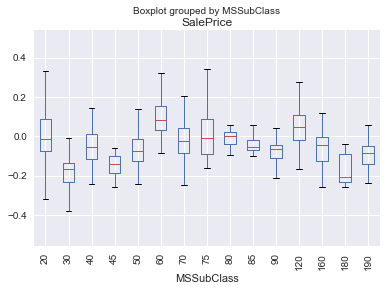

In [245]:
df[:df_train_length].boxplot('SalePrice',by='MSSubClass', rot=90)

In [246]:
df["MSSubClass"]=df["MSSubClass"].astype(str)
df["MSSubClass"] = df.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})

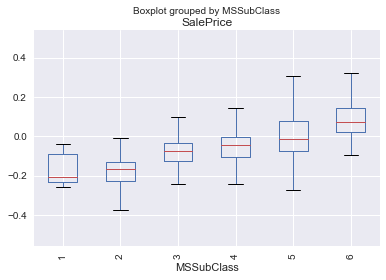

In [247]:
df[:df_train_length].boxplot('SalePrice',by='MSSubClass', rot=90)

## YearBuilt

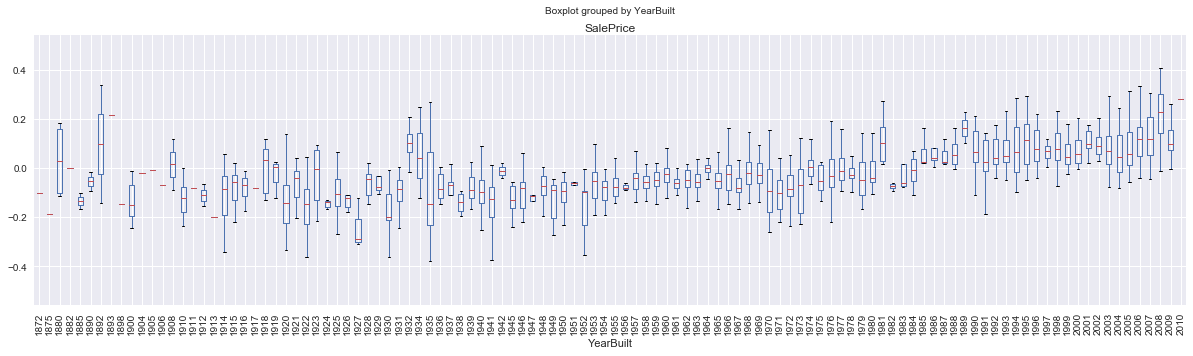

In [248]:
df[:df_train_length].boxplot('SalePrice',by='YearBuilt', rot=90, figsize=(20,5))

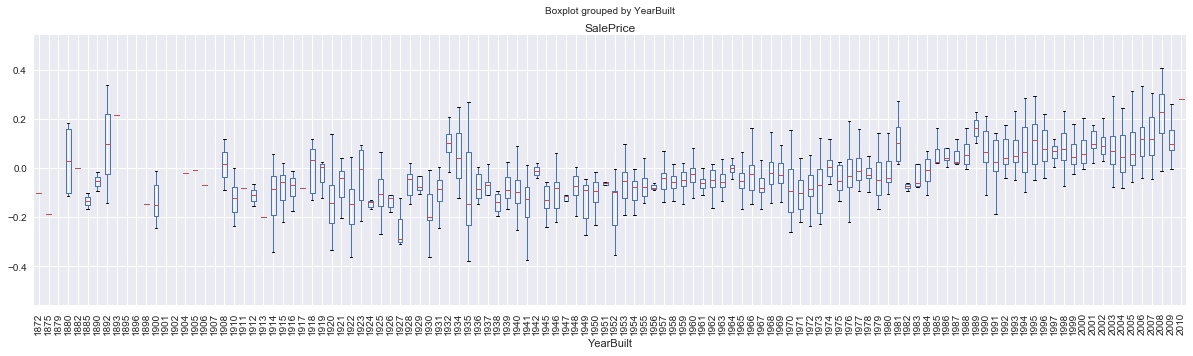

In [249]:
df.boxplot('SalePrice',by='YearBuilt', rot=90, figsize=(20,5))

In [250]:
df['YearBuilt'] = df['YearBuilt'] - 2010
if 0:
    df['YearBuilt'],B = pd.qcut(df['YearBuilt'],20, retbins=True, labels=range(20))

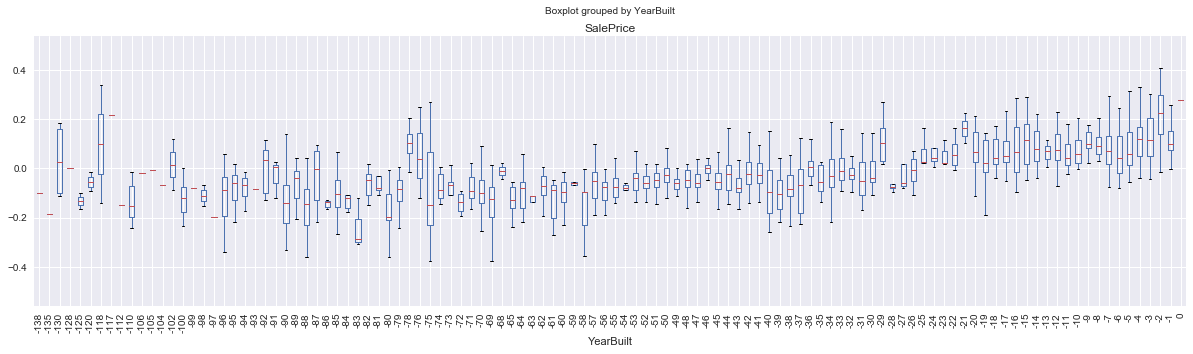

In [251]:
df[:df_train_length].boxplot('SalePrice',by='YearBuilt', rot=90, figsize=(20,5))

In [252]:
if 0:
    YearBuilt_dummy = pd.get_dummies(df['YearBuilt'], prefix='YearBuilt',drop_first=drf)
    df = df.join(YearBuilt_dummy)

## YearRemodAdd

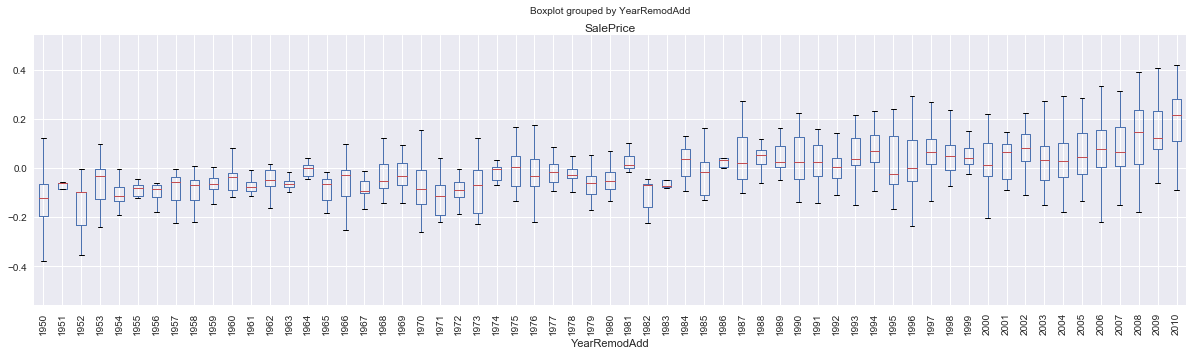

In [253]:
df[:df_train_length].boxplot('SalePrice',by='YearRemodAdd', rot=90, figsize=(20,5))

In [254]:
df['YearRemodAdd'] = 2010 - df.YearRemodAdd

In [255]:
if 0:
    df['YearRemodAdd'],B = pd.qcut(df['YearRemodAdd'],8, retbins=True, labels=range(8))

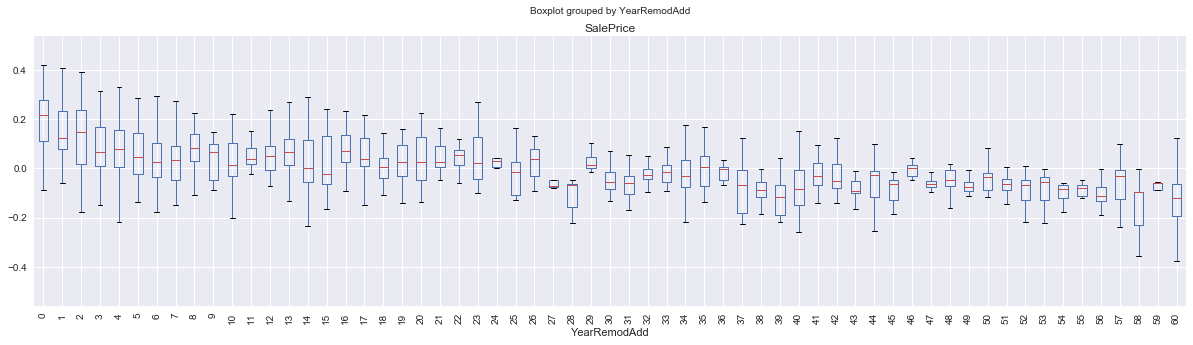

In [256]:
df[:df_train_length].boxplot('SalePrice',by='YearRemodAdd', rot=90, figsize=(20,5))

In [257]:
if 0:
    YearRemodAdd_dummy = pd.get_dummies(df['YearRemodAdd'], prefix='YearRemodAdd',drop_first=drf)
    df = df.join(YearRemodAdd_dummy)

In [258]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder


class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab=LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

In [259]:
if drop_extreme:
    ordinal_columns = ['MSSubClass','LotFrontage','LotArea','LotShape','OverallQual','OverallCond', 'YearBuilt',
                  'YearRemodAdd', 'MasVnrArea','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF',
                   'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual',
                  'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt','GarageFinish','GarageCars',
                  'GarageCond', 'WoodDeckSF', 'OpenPorchSF','Neighborhood','Exterior1st','Condition1','Exterior2nd']
else:
    ordinal_columns = ['MSSubClass','LotFrontage','LotArea','LotShape','OverallQual','OverallCond', 'YearBuilt',
                  'YearRemodAdd', 'MasVnrArea','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF',
                   'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual',
                  'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt','GarageFinish','GarageCars', 'GarageArea',
                  'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'Fence', 'MoSold', 'YrSold','Exterior1st']

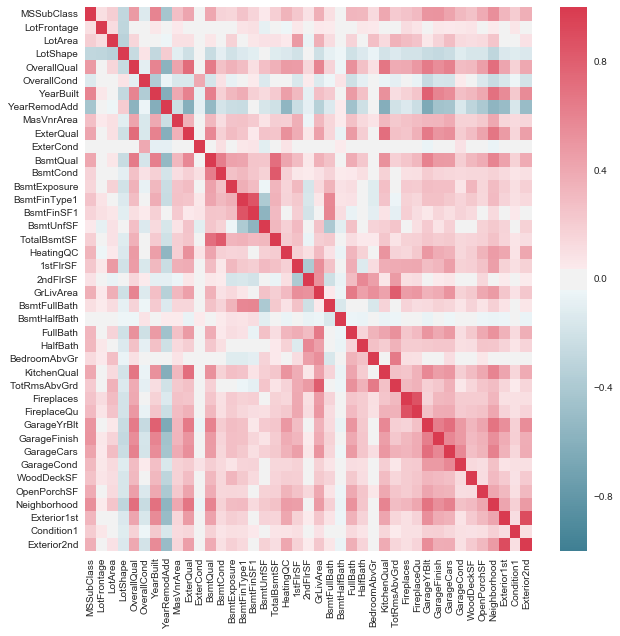

In [260]:
plt.figure(figsize=(10,10))
correlation1 = df[ordinal_columns].corr()
mask = np.zeros_like(correlation1)
indices = np.triu_indices_from(correlation1)
mask[indices] = True
cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlation1, vmin = -1, vmax = 1, \
    cmap = cmap, cbar = True)

## Train-test split

In [261]:
df.drop('Id', axis=1, inplace=True)

In [262]:
if not drop_extreme:
    df.drop(['MasVnrType', 'MSZoning', 'BldgType', 'HouseStyle', 'RoofStyle'], axis=1, inplace=True)
    df.drop(['Foundation', 'Heating', 'SaleType', 'SaleCondition'], axis=1, inplace=True)
else:
    df.drop(['MasVnrType', 'HouseStyle'], axis=1, inplace=True)
    df.drop(['Foundation', 'SaleType', 'SaleCondition','YearBuilt','YearRemodAdd'], axis=1, inplace=True)


In [263]:
df.columns

Index([u'1stFlrSF', u'2ndFlrSF', u'BedroomAbvGr', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinSF1', u'BsmtFinType1', u'BsmtFullBath', u'BsmtHalfBath',
       u'BsmtQual', u'BsmtUnfSF', u'CentralAir', u'Condition1', u'Electrical',
       u'ExterCond', u'ExterQual', u'Exterior1st', u'Exterior2nd',
       u'FireplaceQu', u'Fireplaces', u'FullBath', u'GarageCars',
       u'GarageCond', u'GarageFinish', u'GarageType', u'GarageYrBlt',
       u'GrLivArea', u'HalfBath', u'HeatingQC', u'KitchenQual', u'LandSlope',
       u'LotArea', u'LotFrontage', u'LotShape', u'MSSubClass', u'MasVnrArea',
       u'Neighborhood', u'OpenPorchSF', u'OverallCond', u'OverallQual',
       u'PavedDrive', u'SalePrice', u'Street', u'TotRmsAbvGrd', u'TotalBsmtSF',
       u'WoodDeckSF', u'MasVnrType_BrkCmn', u'MasVnrType_BrkFace',
       u'MasVnrType_None', u'MasVnrType_Stone', u'HouseStyle_1.5Fin',
       u'HouseStyle_1.5Unf', u'HouseStyle_1Story', u'HouseStyle_2.5Fin',
       u'HouseStyle_2.5Unf', u'HouseStyle_2Stor

In [264]:
from sklearn.model_selection import train_test_split

def cross_validate(Xs, ys):
    X_train, X_test, y_train, y_test = train_test_split(
            Xs, ys, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [265]:
train1_X = df[:df_train_length].copy()
train1_X.drop('SalePrice', axis=1, inplace=True)
train1_Y = df[:df_train_length]['SalePrice'].copy()

X_train, X_val, y_train, y_val = cross_validate(train1_X, train1_Y)

X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [266]:
X_train.shape

(1168, 72)

In [267]:
X_val.shape

(292, 72)

In [268]:
y_train.shape

(1168,)

In [269]:
y_val.shape

(292,)

## Model development

### Linear Regression

In [249]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.predict(X_val))

[ 0.14389913 -0.04748926 -0.09234371  0.0887085  -0.17525618 -0.15204974
  0.14832271 -0.09629587  0.35262094 -0.00464364  0.04505954 -0.03452221
  0.09813667 -0.10557143 -0.08959297 -0.04860115  0.13242352 -0.10213309
 -0.06817502  0.03092003 -0.0930634  -0.03570213 -0.25689297 -0.02938073
  0.02466719  0.01802494 -0.00557087 -0.25552842  0.16173551 -0.131753
 -0.03004608  0.06936119 -0.04348283  0.21350148  0.23100438  0.06611546
  0.17411538 -0.10242245  0.10882054  0.22992321  0.07264862 -0.0790008
  0.06632659  0.20731525  0.24898238 -0.03513016 -0.11393497 -0.09103426
 -0.0055872  -0.19862489  0.29097466 -0.03378755 -0.00939041 -0.22163259
  0.0893749  -0.14832905 -0.14743051  0.08815141 -0.07800544 -0.25875647
 -0.04040296 -0.09520207 -0.0550009  -0.03473289  0.07040194 -0.00821366
 -0.09156048  0.08259945 -0.08766669  0.06995017  0.0468011  -0.08746177
 -0.32378036  0.17761895 -0.22998949  0.13418558 -0.08641334 -0.16033503
  0.18118269  0.01149646 -0.08832145 -0.06071546 -0.11

In [250]:
regr.score(X_val,y_val)

0.83766633756300279

In [252]:
import math
print("RMSE: ",math.sqrt(np.mean((regr.predict(X_val) - y_val) ** 2)))

('RMSE: ', 0.05099534308660966)


## Lasso

/Users/pkjain/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


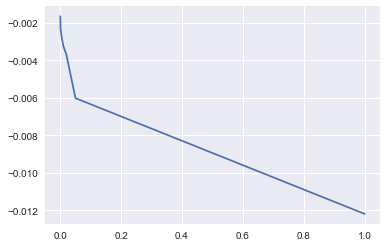

In [253]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Lasso


scorer = make_scorer(mean_squared_error, False)

def rmse_cv(model, X, y):
     return (cross_val_score(model, X, y, scoring=scorer)).mean()

alphas = [1e-4, 5e-4, 1e-3, 5e-3,6e-3,7e-3,8e-3, 0.01, 0.02, 0.05, 1.0]
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=50000), X_train, y_train) for alpha in alphas]
pd.Series(cv_lasso, index = alphas).plot()

In [254]:
model_lasso = Lasso(alpha=1.0, max_iter=50000).fit(X_train, y_train)

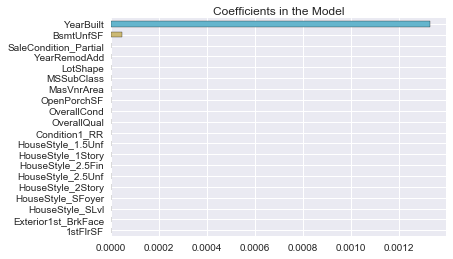

In [255]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

## XGBoost

In [270]:
from sklearn.metrics import explained_variance_score
import xgboost
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import xgboost as xg

In [271]:
# A parameter grid for XGBoost
#params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,4)],  'subsample':[i/10.0 for i in range(6,9)],
#'colsample_bytree':[i/10.0 for i in range(6,9)], 'max_depth': [3,4]}
params = {'min_child_weight':[5,6,7],  'subsample':[0.5,0.6],
'colsample_bytree':[0.5, 0.6], 'max_depth': [3,4,5], 'learning_rate': [0.01], 'n_estimators':[2000]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(X_train, y_train)

# Print the r2 score
print(r2_score(y_val, grid.best_estimator_.predict(X_val))) 


KeyboardInterrupt: 

In [271]:
max_depth = 3
min_child_weight = 10
subsample = 0.5
colsample_bytree = 0.7
objective = 'reg:linear'
num_estimators = 2000
learning_rate = 0.01

#features = df[feature_columns]
#target = df[target_columns]
clf = xg.XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=10, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)

In [261]:
print "Training error = ", r2_score(y_train, clf.predict(X_train)) 

print "Testing error = ", r2_score(y_val, clf.predict(X_val)) 

Training error =  0.963472509147
Testing error =  0.890912713638


In [272]:
print "Training error = ", r2_score(y_train, clf.predict(X_train)) 

print "Testing error = ", r2_score(y_val, clf.predict(X_val)) 

Training error =  0.961607721031
Testing error =  0.885112854522


In [274]:
df.columns

Index([u'1stFlrSF', u'2ndFlrSF', u'BedroomAbvGr', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinSF1', u'BsmtFinType1', u'BsmtFullBath', u'BsmtHalfBath',
       u'BsmtQual',
       ...
       u'YearBuilt_18', u'YearBuilt_19', u'YearRemodAdd_0', u'YearRemodAdd_1',
       u'YearRemodAdd_2', u'YearRemodAdd_3', u'YearRemodAdd_4',
       u'YearRemodAdd_5', u'YearRemodAdd_6', u'YearRemodAdd_7'],
      dtype='object', length=101)

In [282]:
print "Testing error = ", r2_score(y_val, grid.best_estimator_.predict(X_val))

Testing error =  0.890055020461


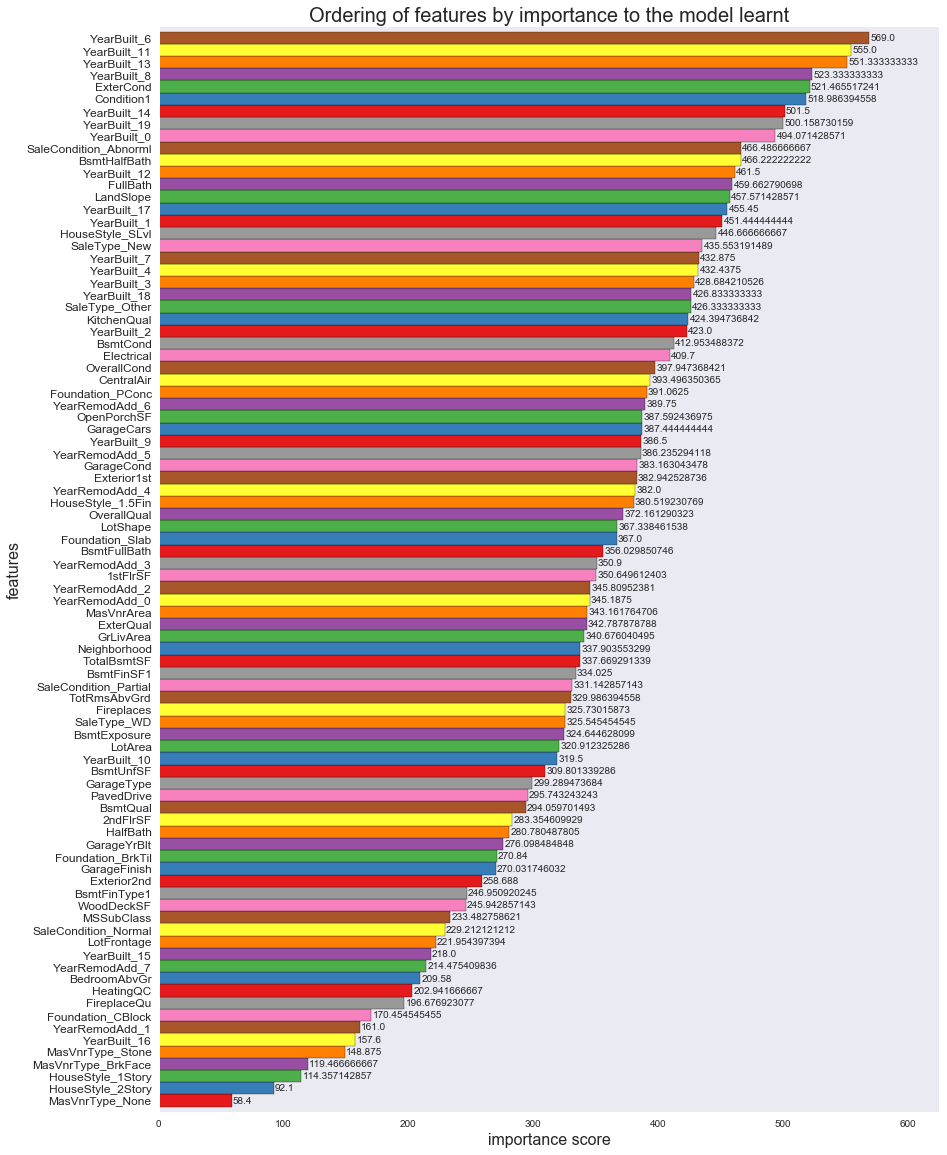

In [275]:
from xgboost import plot_importance, to_graphviz
fig = plt.figure(figsize = (14, 20))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

## Prediction

In [276]:
X_test = df[df_train_length:].copy()
X_test.drop('SalePrice', axis=1, inplace=True)
y_test = clf.predict(X_test)
#y_test = grid.best_estimator_.predict(X_test)

In [277]:
y_test

array([-0.1056031 , -0.01035142,  0.0370917 , ..., -0.01517689,
       -0.12674147,  0.04569045], dtype=float32)

In [278]:
y_test = mean_saleprice + y_test*(max_saleprice - min_saleprice)

In [279]:
y_test

array([ 11.69940281,  11.99222851,  12.13807869, ...,  11.97739315,
        11.63441849,  12.16451359], dtype=float32)

In [280]:
y_test = np.exp(y_test)

In [281]:
y_test

array([ 120499.734375 ,  161494.84375  ,  186853.21875  , ...,
        159116.703125 ,  112918.1484375,  191858.53125  ], dtype=float32)

In [264]:
y_test

array([ 124143.8828125,  163086.203125 ,  183360.828125 , ...,
        162037.578125 ,  116903.671875 ,  209447.171875 ], dtype=float32)

In [282]:
prediction = pd.DataFrame()
prediction['Id'] = df_test.Id
prediction['SalePrice'] = y_test

In [283]:
prediction.to_csv('result.csv', sep=',', index=False)

In [271]:
train1_X.reset_index(drop=True, inplace=True)
train1_Y.reset_index(drop=True, inplace=True)

# k-fold cross validation evaluation of xgboost model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
max_depth = 3
min_child_weight = 10
subsample = 0.5
colsample_bytree = 0.7
objective = 'reg:linear'
num_estimators = 2000
learning_rate = 0.01

#features = df[feature_columns]
#target = df[target_columns]
model = xg.XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)
#model = xg.XGBRegressor()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, train1_X, train1_Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 90.73% (1.72%)


In [272]:
results

array([ 0.90974007,  0.93045452,  0.93265859,  0.87630821,  0.89873717,
        0.91303038,  0.89233528,  0.92370402,  0.9032183 ,  0.89289379])